In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# 1. Загрузить датасет IRIS.
iris = load_iris()
X = iris.data
y = iris.target

In [7]:
# 2. Подготовить выборки: обучающую 50% и тестовую 50%. random_state = 123456
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123456)

In [8]:
# Инициализация переменных для поиска лучшей пары признаков и оптимального количества соседей
best_score = 0
best_pair = None
best_n_neighbors = 0

# Перебор пар признаков и количества ближайших соседей
for i in range(X.shape[1]):
    for j in range(i+1, X.shape[1]):
        for n_neighbors in range(1, 11):  # Перебор от 1 до 10 соседей
            # 3. Выбрать признаки и классификатор
            X_train_ij = X_train[:, [i, j]]
            X_test_ij = X_test[:, [i, j]]

            # Используем K-ближайших соседей как классификатор
            classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
            classifier.fit(X_train_ij, y_train)

            # Оценка качества классификации
            score = classifier.score(X_test_ij, y_test)
            if score > best_score:
                best_score = score
                best_pair = (i, j)
                best_n_neighbors = n_neighbors

In [9]:
# Обучаем классификатор с лучшей парой признаков и оптимальным количеством соседей
X_train_best = X_train[:, best_pair]
X_test_best = X_test[:, best_pair]
classifier_best = KNeighborsClassifier(n_neighbors=best_n_neighbors)
classifier_best.fit(X_train_best, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
# 4. Получить оценку качества классификации.
y_pred = classifier_best.predict(X_test_best)
accuracy = accuracy_score(y_test, y_pred)

In [11]:
# Построение разделяющей границы
x_min, x_max = X[:, best_pair[0]].min() - 1, X[:, best_pair[0]].max() + 1
y_min, y_max = X[:, best_pair[1]].min() - 1, X[:, best_pair[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = classifier_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

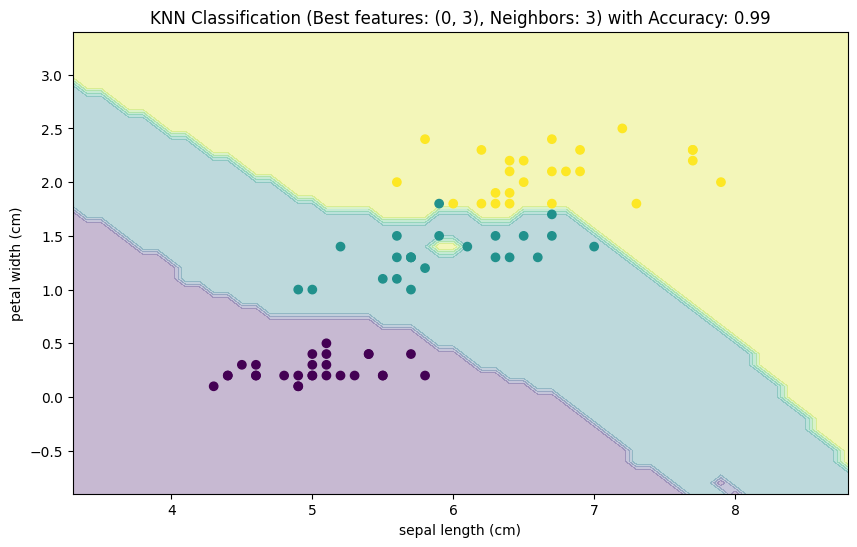

In [12]:
# Визуализация
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test[:, best_pair[0]], X_test[:, best_pair[1]], c=y_test)
plt.title(f"KNN Classification (Best features: {best_pair}, Neighbors: {best_n_neighbors}) with Accuracy: {accuracy:.2f}")
plt.xlabel(iris.feature_names[best_pair[0]])
plt.ylabel(iris.feature_names[best_pair[1]])
plt.show()